
11490434/11490434 [==============================] - 30s 3us/step
Formas de MNIST: (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Procesadas: 0 Tiempo transcurrido: 0.0 segundos
Procesadas: 2000 Tiempo transcurrido: 0.3158750534057617 segundos
Procesadas: 4000 Tiempo transcurrido: 0.667163610458374 segundos
Procesadas: 6000 Tiempo transcurrido: 1.0626447200775146 segundos
Procesadas: 8000 Tiempo transcurrido: 1.4254167079925537 segundos
Procesadas: 10000 Tiempo transcurrido: 1.8105907440185547 segundos
Procesadas: 12000 Tiempo transcurrido: 2.2059218883514404 segundos
Procesadas: 14000 Tiempo transcurrido: 2.5796737670898438 segundos
Procesadas: 16000 Tiempo transcurrido: 2.910851240158081 segundos
Procesadas: 18000 Tiempo transcurrido: 3.248455762863159 segundos
Procesadas: 20000 Tiempo transcurrido: 3.563704013824463 segundos
Procesadas: 22000 Tiempo transcurrido: 3.902416706085205 segundos
Procesadas: 24000 Tiempo transcurrido: 4.2703697681427 segundos
Procesadas: 26000 Tiempo t

c:\Users\MaoYeral\miniconda3\envs\ML_2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


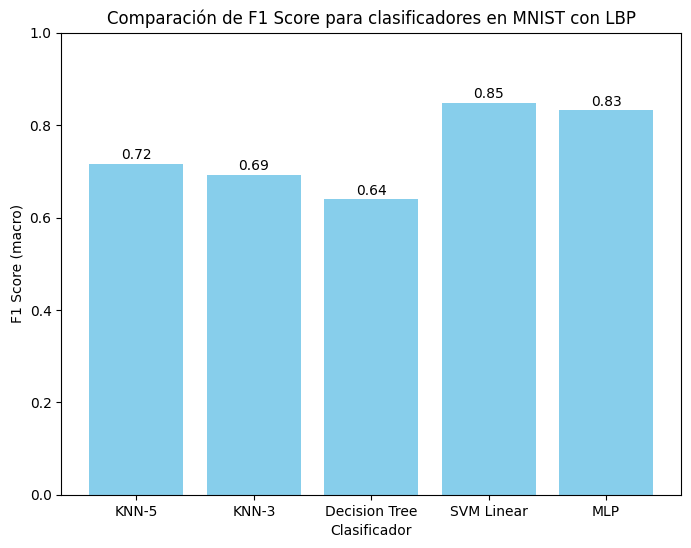

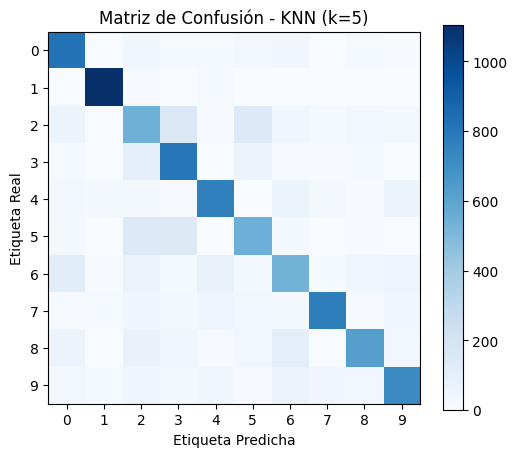

In [1]:
import time
import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import numpy as np
from sklearn.svm import SVC  # Considera usar LinearSVC si es necesario
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix

# Cargar dataset MNIST (Keras)
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print("Formas de MNIST:", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Función LBP vectorizada
def LocalBinaryPattern(img1):
    center = img1[1:-1, 1:-1]
    lbp = ((img1[1:-1, 0:-2] > center).astype(np.uint8) * 1 +
           (img1[0:-2, 0:-2] > center).astype(np.uint8) * 2 +
           (img1[0:-2, 1:-1] > center).astype(np.uint8) * 4 +
           (img1[0:-2, 2:]   > center).astype(np.uint8) * 8 +
           (img1[1:-1, 2:]   > center).astype(np.uint8) * 16 +
           (img1[2:,   2:]   > center).astype(np.uint8) * 32 +
           (img1[2:,   1:-1] > center).astype(np.uint8) * 64 +
           (img1[2:,   0:-2] > center).astype(np.uint8) * 128)
    result = np.zeros_like(img1, dtype=np.uint8)
    result[1:-1, 1:-1] = lbp
    return result

# Extraer histograma de imagen LBP (256 bins)
def CreateX(X_images):
    features = []
    start = time.time()
    for idx, img in enumerate(X_images):
         lbp_img = LocalBinaryPattern(img)
         feat, _ = np.histogram(lbp_img, bins=256, range=(0,256))
         features.append(feat)
         if idx % 2000 == 0:
             print("Procesadas:", idx, "Tiempo transcurrido:", time.time()-start, "segundos")
    return np.array(features)

# Extraer LBP de train y test
X_train_LBP = CreateX(X_train)
X_test_LBP  = CreateX(X_test)


# Clasificador: KNN con k=5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_LBP, y_train)
y_pred_knn5 = knn5.predict(X_test_LBP)
cm_knn5 = confusion_matrix(y_test, y_pred_knn5)
f1_knn5 = f1_score(y_test, y_pred_knn5, average='macro')
print("Matriz de Confusión KNN (k=5):\n", cm_knn5)
print("F1-score macro KNN-5:", f1_knn5)

# Clasificador: KNN con k=3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_LBP, y_train)
y_pred_knn3 = knn3.predict(X_test_LBP)
cm_knn3 = confusion_matrix(y_test, y_pred_knn3)
f1_knn3 = f1_score(y_test, y_pred_knn3, average='macro')
print("Matriz de Confusión KNN (k=3):\n", cm_knn3)
print("F1-score macro KNN-3:", f1_knn3)

# Clasificador: Árbol de Decisión
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_LBP, y_train)
y_pred_dt = dt.predict(X_test_LBP)
cm_dt = confusion_matrix(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='macro')
print("Matriz de Confusión Decision Tree:\n", cm_dt)
print("F1-score macro DT:", f1_dt)

# Clasificador: SVM con kernel lineal
svm_lin = SVC(kernel='linear')
svm_lin.fit(X_train_LBP, y_train)
y_pred_svm_lin = svm_lin.predict(X_test_LBP)
cm_svm_lin = confusion_matrix(y_test, y_pred_svm_lin)
f1_svm_lin = f1_score(y_test, y_pred_svm_lin, average='macro')
print("Matriz de Confusión SVM lineal:\n", cm_svm_lin)
print("F1-score macro SVM lineal:", f1_svm_lin)

# Clasificador: Red Neuronal (MLP simple)
mlp = MLPClassifier(hidden_layer_sizes=(128,), max_iter=10, random_state=0)
mlp.fit(X_train_LBP, y_train)
y_pred_mlp = mlp.predict(X_test_LBP)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp, average='macro')
print("Matriz de Confusión MLP:\n", cm_mlp)
print("F1-score macro MLP:", f1_mlp)

# --------------------------
# Gráficas para interpretar resultados

# 1. Comparación de F1-scores
classifiers = ['KNN-5', 'KNN-3', 'Decision Tree', 'SVM Linear', 'MLP']
f1_scores = [f1_knn5, f1_knn3, f1_dt, f1_svm_lin, f1_mlp]

plt.figure(figsize=(8,6))
plt.bar(classifiers, f1_scores, color='skyblue')
plt.xlabel("Clasificador")
plt.ylabel("F1 Score (macro)")
plt.title("Comparación de F1 Score para clasificadores en MNIST con LBP")
plt.ylim([0, 1])
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()

# 2. Ejemplo de visualización de una matriz de confusión (KNN k=5)
plt.figure(figsize=(6,5))
plt.imshow(cm_knn5, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - KNN (k=5)")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()
